In [1]:
require 'nn'
require 'cutorch'
require 'cudnn'
require 'paths'
image = require 'image'
require 'xlua'        -- for progress bar
tsne = require 'tsne'
require 'Dataframe' -- imports many dependencies to read a csv file!

In [2]:
net = torch.load('./deepDress.AlexnetBaseline.t7')

In [3]:
print(tostring(net))

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> (16) -> (17) -> (18) -> (19) -> (20) -> (21) -> (22) -> (23) -> (24) -> output]
  (1): cudnn.SpatialConvolution(3 -> 96, 11x11, 4,4)
  (2): cudnn.ReLU
  (3): cudnn.SpatialMaxPooling(3x3, 2,2)
  (4): cudnn.SpatialCrossMapLRN
  (5): cudnn.SpatialConvolution(96 -> 256, 5x5, 1,1, 2,2)
  (6): cudnn.ReLU
  (7): cudnn.SpatialMaxPooling(3x3, 2,2)
  (8): cudnn.SpatialCrossMapLRN
  (9): cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
  (10): cudnn.ReLU
  (11): cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)
  (12): cudnn.ReLU
  (13): cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
  (14): cudnn.ReLU
  (15): cudnn.SpatialMaxPooling(3x3, 2,2)
  (16): nn.View(-1)
  (17): nn.Linear(9216 -> 4096)
  (18): cudnn.ReLU
  (19): nn.Dropout(0.500000)
  (20): nn.Linear(4096 -> 4096)
  (21): cudnn.ReLU
  (22): nn.Dropout(0.500000)
  (23): nn.Linear(4096 -> 2573

In [4]:
img_mean_name = 'ilsvrc_2012_mean.t7'

function preprocess(im, img_mean)
  -- rescale the image
  local im3 = image.scale(im,224,224,'bilinear')*255
  -- RGB2BGR
  local im4 = im3:clone()
  im4[{1,{},{}}] = im3[{3,{},{}}]
  im4[{3,{},{}}] = im3[{1,{},{}}]

  -- subtract imagenet mean
  return im4 - image.scale(img_mean, 224, 224, 'bilinear')
end

img_mean = torch.load(img_mean_name).img_mean:transpose(3,1)

In [5]:
-- Features path
-- step 1,read randomly from files

-- step 2, extract features
-- step 3, run t-sne from manifold

In [6]:
function extract_feat(image_name, layer_to_extract)
  im = image.load(image_name, 3)

  I = preprocess(im, img_mean)
  -- Propagate through the network and sort outputs in decreasing order and show 5 best classes

  -- do forward pass of model on the images
  net:forward(I:cuda()) -- super inefficient, should do batch
  
  -- read the activ/ations from the requested layer
  local feat = net.modules[layer_to_extract].output

  return feat
end

In [8]:
datadir = '/media/saurabh/my ssd/nordstrom/'
num_labels = #paths.dir(datadir) - 2 -- for '.', '..' filenames

In [9]:
feat = torch.CudaLongTensor(num_labels, 4096):zero()
labels = {}
print(feat:size())

 3802
 4096
[torch.LongStorage of size 2]



In [10]:
-- load features
local cntr = 1
for f in paths.files(datadir, 'jpg') do
    xlua.progress(cntr, num_labels) -- display progress
    local imgfeat = extract_feat(datadir .. f, 20)
    local test = imgfeat:float()
    labels[cntr]  = f
    feat[{cntr, {}}] = test
    cntr = cntr + 1
end

print('finished loading features for ' .. cntr .. ' products')

Progress: 44 / 3802	


Progress: 100 / 3802	


Progress: 151 / 3802	


Progress: 199 / 3802	


Progress: 248 / 3802	


Progress: 301 / 3802	


Progress: 350 / 3802	


Progress: 397 / 3802	


Progress: 451 / 3802	


Progress: 497 / 3802	


Progress: 552 / 3802	


Progress: 604 / 3802	


Progress: 653 / 3802	


Progress: 707 / 3802	


Progress: 761 / 3802	


Progress: 812 / 3802	


Progress: 858 / 3802	


Progress: 907 / 3802	


Progress: 955 / 3802	


Progress: 1007 / 3802	


Progress: 1054 / 3802	


Progress: 1102 / 3802	


Progress: 1151 / 3802	


Progress: 1200 / 3802	


Progress: 1251 / 3802	


Progress: 1307 / 3802	


Progress: 1359 / 3802	


Progress: 1417 / 3802	


Progress: 1470 / 3802	


Progress: 1516 / 3802	


Progress: 1568 / 3802	


Progress: 1620 / 3802	


Progress: 1669 / 3802	


Progress: 1719 / 3802	


Progress: 1762 / 3802	


Progress: 1814 / 3802	


Progress: 1876 / 3802	


Progress: 1919 / 3802	


Progress: 1963 / 3802	


Progress: 2013 / 3802	


Progress: 2063 / 3802	


Progress: 2117 / 3802	


Progress: 2165 / 3802	


Progress: 2208 / 3802	


Progress: 2254 / 3802	


Progress: 2306 / 3802	


Progress: 2355 / 3802	


Progress: 2402 / 3802	


Progress: 2453 / 3802	


Progress: 2504 / 3802	


Progress: 2556 / 3802	


Progress: 2604 / 3802	


Progress: 2655 / 3802	


Progress: 2704 / 3802	


Progress: 2760 / 3802	


Progress: 2800 / 3802	


Progress: 2845 / 3802	


Progress: 2895 / 3802	


Progress: 2941 / 3802	


Progress: 2986 / 3802	


Progress: 3032 / 3802	


Progress: 3080 / 3802	


Progress: 3133 / 3802	


Progress: 3178 / 3802	


Progress: 3228 / 3802	


Progress: 3275 / 3802	


Progress: 3321 / 3802	


Progress: 3364 / 3802	


Progress: 3409 / 3802	


Progress: 3464 / 3802	


Progress: 3519 / 3802	


Progress: 3570 / 3802	


Progress: 3625 / 3802	


Progress: 3676 / 3802	


Progress: 3719 / 3802	


Progress: 3769 / 3802	


finished loading features for 3803 products	


In [11]:
local timer = torch.Timer()
p = tsne(feat:double(), 2, 10, 5000, 0.5, 7)
print('Successfully performed t-SNE in ' .. timer:time().real .. ' seconds.')

Performing t-SNE using 7 cores.
Using no_dims = 2, perplexity = 10.000000, and theta = 0.500000
Computing input similarities...


Building tree...


Done in 20.00 seconds (sparsity = 0.013318)!
Learning embedding...


Iteration 50: error is 96.522656 (50 iterations in 1.00 seconds)


Iteration 100: error is 96.438898 (50 iterations in 0.00 seconds)


Iteration 150: error is 94.419085 (50 iterations in 0.00 seconds)


Iteration 200: error is 94.238034 (50 iterations in 1.00 seconds)


Iteration 250: error is 5.354654 (50 iterations in 0.00 seconds)


Iteration 300: error is 3.309502 (50 iterations in 0.00 seconds)


Iteration 350: error is 2.876003 (50 iterations in 0.00 seconds)


Iteration 400: error is 2.647546 (50 iterations in 1.00 seconds)


Iteration 450: error is 2.506120 (50 iterations in 0.00 seconds)


Iteration 500: error is 2.415061 (50 iterations in 0.00 seconds)


Iteration 550: error is 2.353820 (50 iterations in 0.00 seconds)


Iteration 600: error is 2.310908 (50 iterations in 1.00 seconds)


Iteration 650: error is 2.282745 (50 iterations in 0.00 seconds)


Iteration 700: error is 2.264946 (50 iterations in 0.00 seconds)


Iteration 750: error is 2.252730 (50 iterations in 0.00 seconds)


Iteration 800: error is 2.240456 (50 iterations in 1.00 seconds)


Iteration 850: error is 2.228964 (50 iterations in 0.00 seconds)


Iteration 900: error is 2.217291 (50 iterations in 0.00 seconds)


Iteration 950: error is 2.211379 (50 iterations in 1.00 seconds)


Iteration 1000: error is 2.205475 (50 iterations in 0.00 seconds)


Iteration 1050: error is 2.199244 (50 iterations in 0.00 seconds)


Iteration 1100: error is 2.192301 (50 iterations in 0.00 seconds)


Iteration 1150: error is 2.187128 (50 iterations in 1.00 seconds)


Iteration 1200: error is 2.183235 (50 iterations in 0.00 seconds)


Iteration 1250: error is 2.180026 (50 iterations in 0.00 seconds)


Iteration 1300: error is 2.175932 (50 iterations in 0.00 seconds)


Iteration 1350: error is 2.172393 (50 iterations in 1.00 seconds)


Iteration 1400: error is 2.169657 (50 iterations in 0.00 seconds)


Iteration 1450: error is 2.166001 (50 iterations in 0.00 seconds)


Iteration 1500: error is 2.163241 (50 iterations in 0.00 seconds)


Iteration 1550: error is 2.160167 (50 iterations in 1.00 seconds)


Iteration 1600: error is 2.156571 (50 iterations in 0.00 seconds)


Iteration 1650: error is 2.154035 (50 iterations in 0.00 seconds)


Iteration 1700: error is 2.150305 (50 iterations in 1.00 seconds)


Iteration 1750: error is 2.146462 (50 iterations in 0.00 seconds)


Iteration 1800: error is 2.143001 (50 iterations in 0.00 seconds)


Iteration 1850: error is 2.140541 (50 iterations in 0.00 seconds)


Iteration 1900: error is 2.137788 (50 iterations in 1.00 seconds)


Iteration 1950: error is 2.134989 (50 iterations in 0.00 seconds)


Iteration 2000: error is 2.131998 (50 iterations in 0.00 seconds)


Iteration 2050: error is 2.129170 (50 iterations in 0.00 seconds)


Iteration 2100: error is 2.126519 (50 iterations in 1.00 seconds)


Iteration 2150: error is 2.124198 (50 iterations in 0.00 seconds)


Iteration 2200: error is 2.122168 (50 iterations in 0.00 seconds)


Iteration 2250: error is 2.120029 (50 iterations in 1.00 seconds)


Iteration 2300: error is 2.118306 (50 iterations in 0.00 seconds)


Iteration 2350: error is 2.116207 (50 iterations in 1.00 seconds)


Iteration 2400: error is 2.114187 (50 iterations in 0.00 seconds)


Iteration 2450: error is 2.112361 (50 iterations in 0.00 seconds)


Iteration 2500: error is 2.110370 (50 iterations in 0.00 seconds)


Iteration 2550: error is 2.108550 (50 iterations in 1.00 seconds)


Iteration 2600: error is 2.106960 (50 iterations in 0.00 seconds)


Iteration 2650: error is 2.105279 (50 iterations in 0.00 seconds)


Iteration 2700: error is 2.103730 (50 iterations in 0.00 seconds)


Iteration 2750: error is 2.101980 (50 iterations in 1.00 seconds)


Iteration 2800: error is 2.100149 (50 iterations in 0.00 seconds)


Iteration 2850: error is 2.098821 (50 iterations in 0.00 seconds)


Iteration 2900: error is 2.097678 (50 iterations in 0.00 seconds)


Iteration 2950: error is 2.095871 (50 iterations in 1.00 seconds)


Iteration 3000: error is 2.094662 (50 iterations in 0.00 seconds)


Iteration 3050: error is 2.093150 (50 iterations in 0.00 seconds)


Iteration 3100: error is 2.091963 (50 iterations in 1.00 seconds)


Iteration 3150: error is 2.090577 (50 iterations in 0.00 seconds)


Iteration 3200: error is 2.089151 (50 iterations in 0.00 seconds)


Iteration 3250: error is 2.087543 (50 iterations in 1.00 seconds)


Iteration 3300: error is 2.086017 (50 iterations in 0.00 seconds)


Iteration 3350: error is 2.085072 (50 iterations in 0.00 seconds)


Iteration 3400: error is 2.083719 (50 iterations in 1.00 seconds)


Iteration 3450: error is 2.082482 (50 iterations in 0.00 seconds)


Iteration 3500: error is 2.081212 (50 iterations in 0.00 seconds)


Iteration 3550: error is 2.080088 (50 iterations in 0.00 seconds)


Iteration 3600: error is 2.078919 (50 iterations in 1.00 seconds)


Iteration 3650: error is 2.077962 (50 iterations in 0.00 seconds)


Iteration 3700: error is 2.076836 (50 iterations in 0.00 seconds)


Iteration 3750: error is 2.075582 (50 iterations in 0.00 seconds)


Iteration 3800: error is 2.074399 (50 iterations in 1.00 seconds)


Iteration 3850: error is 2.073334 (50 iterations in 0.00 seconds)


Iteration 3900: error is 2.072299 (50 iterations in 0.00 seconds)


Iteration 3950: error is 2.071211 (50 iterations in 0.00 seconds)


Iteration 4000: error is 2.070510 (50 iterations in 1.00 seconds)


Iteration 4050: error is 2.069736 (50 iterations in 0.00 seconds)


Iteration 4100: error is 2.069206 (50 iterations in 0.00 seconds)


Iteration 4150: error is 2.068688 (50 iterations in 0.00 seconds)


Iteration 4200: error is 2.067888 (50 iterations in 1.00 seconds)


Iteration 4250: error is 2.067048 (50 iterations in 0.00 seconds)


Iteration 4300: error is 2.066602 (50 iterations in 0.00 seconds)


Iteration 4350: error is 2.065782 (50 iterations in 1.00 seconds)


Iteration 4400: error is 2.065010 (50 iterations in 0.00 seconds)


Iteration 4450: error is 2.064104 (50 iterations in 0.00 seconds)


Iteration 4500: error is 2.063462 (50 iterations in 0.00 seconds)


Iteration 4550: error is 2.063038 (50 iterations in 1.00 seconds)


Iteration 4600: error is 2.062574 (50 iterations in 0.00 seconds)


Iteration 4650: error is 2.061948 (50 iterations in 0.00 seconds)


Iteration 4700: error is 2.061472 (50 iterations in 0.00 seconds)


Iteration 4750: error is 2.060705 (50 iterations in 1.00 seconds)


Iteration 4800: error is 2.059934 (50 iterations in 0.00 seconds)


Iteration 4850: error is 2.059106 (50 iterations in 0.00 seconds)


Iteration 4900: error is 2.058220 (50 iterations in 0.00 seconds)


Iteration 4950: error is 2.057539 (50 iterations in 1.00 seconds)


Iteration 4999: error is 2.056721 (50 iterations in 0.00 seconds)
Fitting performed in 28.00 seconds.
Successfully performed t-SNE in 48.861529111862 seconds.	


In [12]:
df = Dataframe()

In [13]:
df:load_csv{path='/home/saurabh/Documents/Code/python/nordstrom/nordstrom4.csv', header=true}


+-------------------------------------------------+
| seq | id      | color               | IsDefault |
+-------------------------------------------------+
|   1 | 5238439 | BLACK               | true      |
|   2 | 5238439 | BLUE                | false     |
|   3 | 5204158 | BLACK               | true      |
|   4 | 5204158 | NAVY                | false     |
|   5 | 5204158 | WINE RED            | false     |
|   6 | 5249813 | BLACK               | false     |
|   7 | 5249813 | DARK GREY           | true      |
|   8 | 5249813 | MERLOT              | false     |
|   9 | 5249813 | OLIVE               | false     |
|  10 | 5160873 | GREY CLOUDY HEATHER | true      |
| ...                                             |
+-------------------------------------------------+
	


In [14]:
df:where('seq', tonumber('63')):get_column('id')[1]

5244867	


In [15]:
-- write to file
--local s = {900,1200}
local s = {1800, 2400}
local b = 32

local p_ = p:clone()
local px = p_:select(2,1)
local py = p_:select(2,2)

px = (px - px:min()) / (px:max() - px:min())
py = (py - py:min()) / (py:max() - py:min())

local f = assert(io.open('tsne.nordstrom.csv', 'w'))
f:write('eigen1,eigen2,stylename,img,png\n')

-- im = torch.FloatTensor(3,s[1],s[2]):fill(0)
im = torch.DoubleTensor(3,s[1],s[2]):fill(0)
for idx, c in pairs(labels)
do
    xlua.progress(idx, num_labels) -- display progress
    local localfile = datadir .. c
    local seq, ext = string.gsub(c, '.jpg', '')
    local x = math.ceil(b + px[idx]*s[1]*0.95)
    local y = math.ceil(b + py[idx]*s[2]*0.95)
    if paths.filep(localfile) then
        local img = image.load(localfile, 3)
        local scaled = image.scale(img,b,b)
        local buff = x .. ',' .. 
            y .. ',' .. 
            df:where('seq', tonumber(seq)):get_column('id')[1] .. ',' .. -- ugh, probably slow
            c .. ',' ..
            seq .. '.png' ..
--        ',' .. 
--            products[c]['imageURL'] .. ',' ..
--            products[c]['designer'] .. 
            '\n'

        f:write(buff)
        im[{{},{x-b/2,x+b/2-1},{y-b/2,y+b/2-1}}]:add(scaled)
    end
end

f:close()
print('finished writing csv file')

Progress: 1 / 3802	


Progress: 433 / 3802	


Progress: 847 / 3802	


Progress: 1273 / 3802	


Progress: 1696 / 3802	


Progress: 2132 / 3802	


Progress: 2563 / 3802	


Progress: 2999 / 3802	


Progress: 3432 / 3802	


finished writing csv file	


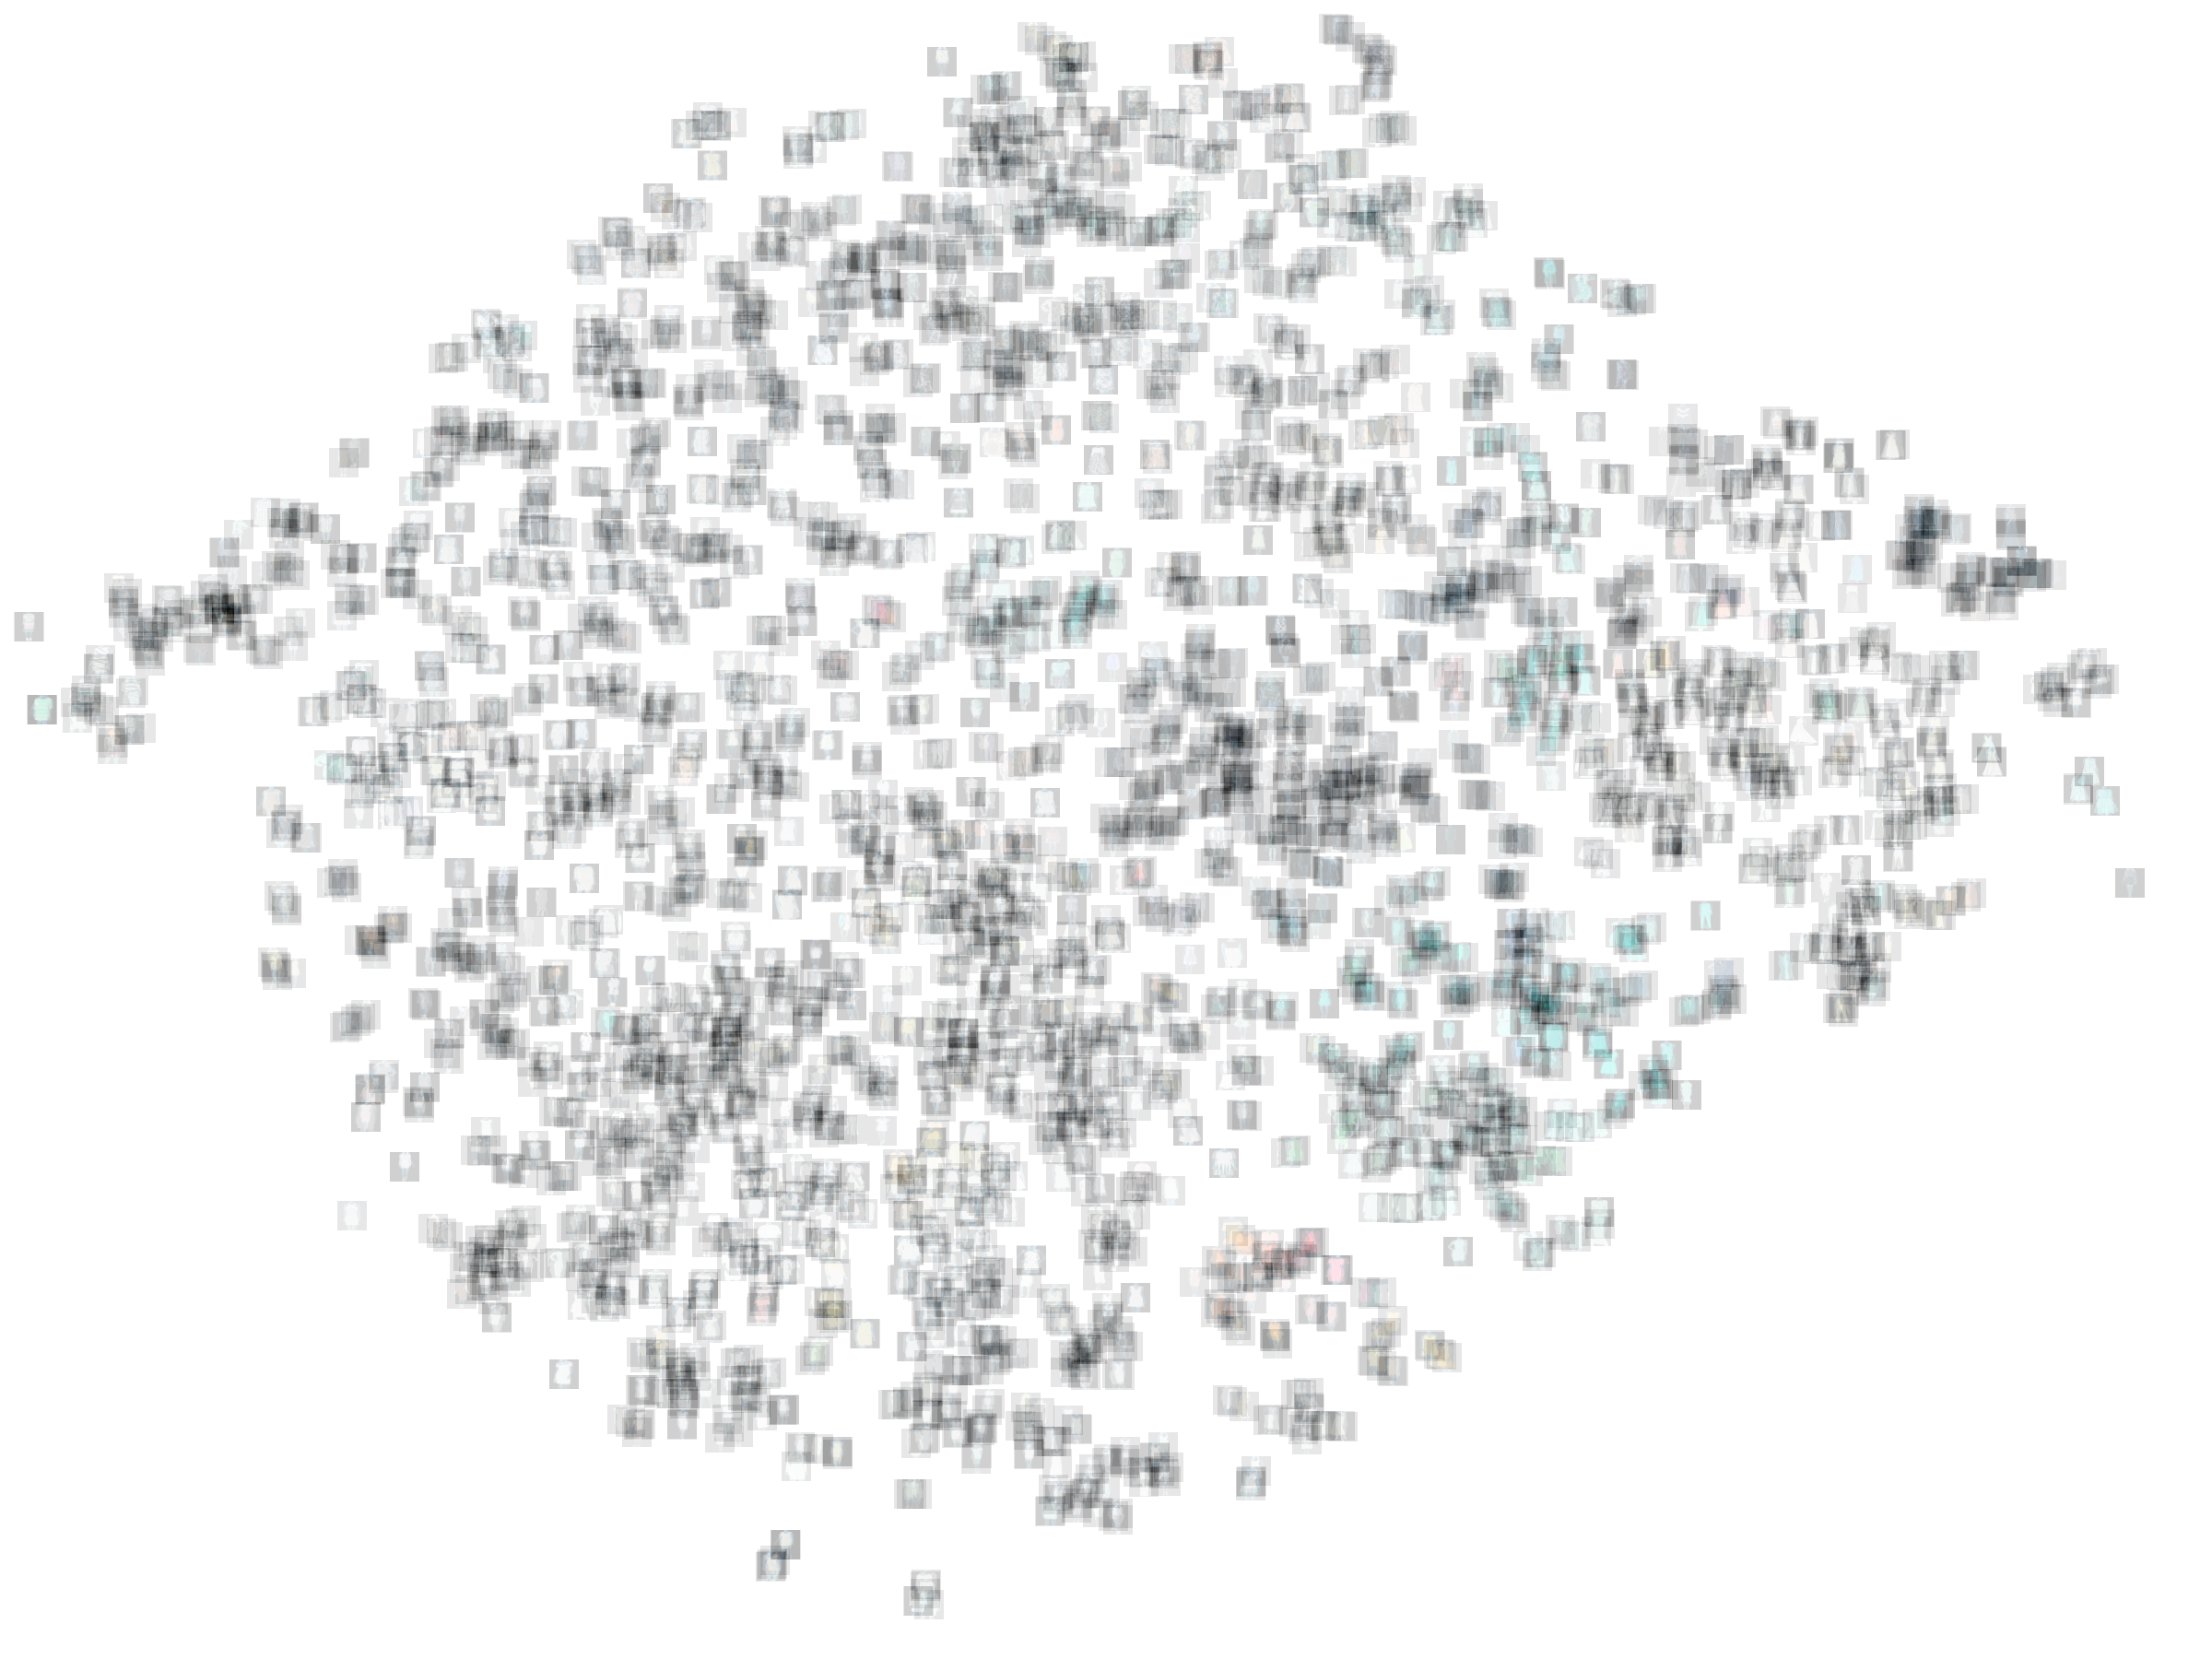

In [16]:
itorch.image(-im)